In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import glob

In [ ]:
kom_df = pd.read_csv("UTS and Yield.csv")

kom_df.head(5)

,ID,Grouping,Material Type,Material Name,Yield Strength (MPa),Tensile Strength (MPa)
0,1,Abrasion Resistant Steel,Plate,ABREX450,1192,1469
1,2,Abrasion Resistant Steel,Plate,EverHard360,1083,1246
2,3,Abrasion Resistant Steel,Plate,EverHard500,1297,1449
3,4,Abrasion Resistant Steel,Plate,EverHard500LE,1203,1681
4,5,Abrasion Resistant Steel,Plate,EverHard500LE-K,-,-


In [ ]:
kom_df.rename(columns={'Grouping ': 'Grouping', 'Material Type': 'Type', 'Material Name': 'Name', 'Yield Strength (MPa)': 'YS', 'Tensile Strength (MPa)': 'UTS'}, inplace=True)

print(kom_df)

     ID                   Grouping       Type             Name      YS  \
0      1  Abrasion Resistant Steel      Plate         ABREX450    1192   
1      2  Abrasion Resistant Steel      Plate      EverHard360    1083   
2      3  Abrasion Resistant Steel      Plate      EverHard500    1297   
3      4  Abrasion Resistant Steel      Plate    EverHard500LE    1203   
4      5  Abrasion Resistant Steel      Plate  EverHard500LE-K       -   
..   ...                       ...        ...              ...     ...   
101  102                      HSLA  Round Bar          B30MV6L     450   
102  103                      HSLA  Round Bar        Ovako 280     410   
103  104                      HSLA  Round Bar         HX500LAD     500   
104  105                      HSLA  Round Bar         HX460LAD     460   
105  106                      HSLA  Round Bar        SAE 1137V  579.16   

         UTS  
0       1469  
1       1246  
2       1449  
3       1681  
4          -  
..       ...  
101   

In [ ]:
kom_df = kom_df.replace({'YS': r'\-', 'UTS': r'\-'}, {'YS' : np.NaN, 'UTS' : np.NaN}, regex = True)

kom_df.head(5)

,ID,Grouping,Type,Name,YS,UTS
0,1,Abrasion Resistant Steel,Plate,ABREX450,1192,1469
1,2,Abrasion Resistant Steel,Plate,EverHard360,1083,1246
2,3,Abrasion Resistant Steel,Plate,EverHard500,1297,1449
3,4,Abrasion Resistant Steel,Plate,EverHard500LE,1203,1681
4,5,Abrasion Resistant Steel,Plate,EverHard500LE-K,NaN,NaN


In [ ]:
kom_df.dropna(inplace = True)
kom_df.index = np.arange(1, len(kom_df) + 1)

kom_df.head(5)

,ID,Grouping,Type,Name,YS,UTS
1,1,Abrasion Resistant Steel,Plate,ABREX450,1192,1469
2,2,Abrasion Resistant Steel,Plate,EverHard360,1083,1246
3,3,Abrasion Resistant Steel,Plate,EverHard500,1297,1449
4,4,Abrasion Resistant Steel,Plate,EverHard500LE,1203,1681
5,6,Abrasion Resistant Steel,Plate,HARDOX 400,1000,1250


In [ ]:
kom_df.drop(columns = 'ID ', inplace = True)

kom_df.head(5)

,Grouping,Type,Name,YS,UTS
1,Abrasion Resistant Steel,Plate,ABREX450,1192,1469
2,Abrasion Resistant Steel,Plate,EverHard360,1083,1246
3,Abrasion Resistant Steel,Plate,EverHard500,1297,1449
4,Abrasion Resistant Steel,Plate,EverHard500LE,1203,1681
5,Abrasion Resistant Steel,Plate,HARDOX 400,1000,1250


In [ ]:
kom_df.describe()

,Grouping,Type,Name,YS,UTS
count,94,94,94,94,94
unique,4,3,94,65,65
top,HSLA,Plate,ABREX450,350,650
freq,29,45,1,4,7


In [ ]:
kom_df.dtypes

Grouping    object
Type        object
Name        object
YS          object
UTS         object
dtype: object

Understanding the dataset (Data Visualization)

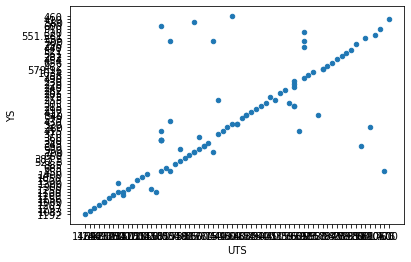

In [ ]:
kom_df.plot(x = 'UTS', y = 'YS', kind = 'scatter')

plt.show()

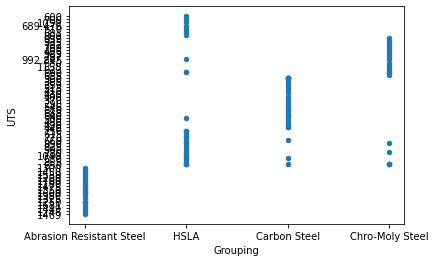

In [ ]:
kom_df.plot(x = 'Grouping', y = 'UTS', kind = 'scatter')

plt.show()

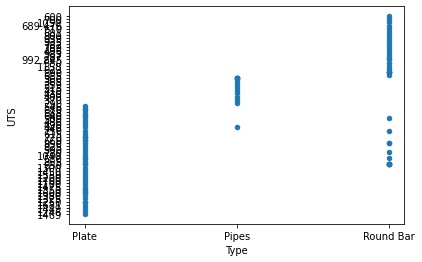

In [ ]:
kom_df.plot(x = 'Type', y = 'UTS', kind = 'scatter')

plt.show()

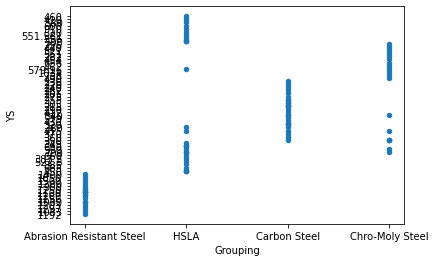

In [ ]:
kom_df.plot(x = 'Grouping', y = 'YS', kind = 'scatter')

plt.show()

Remove Outliers

In [ ]:
kom_group = kom_df.groupby(kom_df["Grouping"])

kom_chromol = kom_group.get_group("Chro-Moly Steel")
kom_cs = kom_group.get_group("Carbon Steel")
kom_hsla = kom_group.get_group("HSLA")
kom_ars = kom_group.get_group("Abrasion Resistant Steel")

kom_chromol.head(5)

kom_chromol.describe()

,Grouping,Type,Name,YS,UTS
count,19,19,19,19,19
unique,1,1,19,17,16
top,Chro-Moly Steel,Round Bar,Hitachi SCM435,350,650
freq,19,19,1,3,3


In [ ]:
kom_chromol.YS = pd.to_numeric(kom_chromol.YS)

kom_chromol["YS_z_score"] = (kom_chromol["YS"] - kom_chromol["YS"].mean())/kom_chromol["YS"].std()

print(kom_chromol["YS_z_score"])

60   -0.947407
61   -0.605903
62   -0.211860
63    0.103375
64    1.185680
65    0.891461
66    2.646267
67   -0.999946
68    0.256579
69   -0.358969
70    0.660289
71   -0.947407
72   -0.401000
73   -1.304673
74   -0.947407
75    0.108629
76   -0.048989
77   -0.474555
78    1.395837
Name: YS_z_score, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
kom_chromol = kom_chromol[abs(kom_chromol["YS_z_score"]) < 1]

kom_chromol = kom_chromol.drop(['YS_z_score'], axis = 1)

In [ ]:
kom_df_new = pd.concat([kom_ars, kom_hsla, kom_cs, kom_chromol], ignore_index=True)

print(kom_df_new)

                    Grouping       Type           Name     YS   UTS
0   Abrasion Resistant Steel      Plate       ABREX450   1192  1469
1   Abrasion Resistant Steel      Plate    EverHard360   1083  1246
2   Abrasion Resistant Steel      Plate    EverHard500   1297  1449
3   Abrasion Resistant Steel      Plate  EverHard500LE   1203  1681
4   Abrasion Resistant Steel      Plate     HARDOX 400   1000  1250
..                       ...        ...            ...    ...   ...
85           Chro-Moly Steel  Round Bar     UNS H41350  454.0   496
86           Chro-Moly Steel  Round Bar     JIS SCCRM3  350.0   650
87           Chro-Moly Steel  Round Bar      JIS STH22  551.0   782
88           Chro-Moly Steel  Round Bar      JIS SCM3H  521.0   935
89           Chro-Moly Steel  Round Bar     JIS SCCrM3  440.0   690

[90 rows x 5 columns]


Checking new dataframe 

In [ ]:
kom_df_new["YS"] = kom_df_new["YS"].astype(complex)
kom_df_new["UTS"] = kom_df_new["UTS"].astype(complex)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


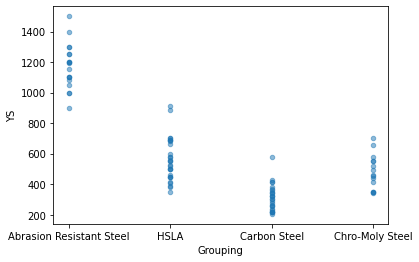

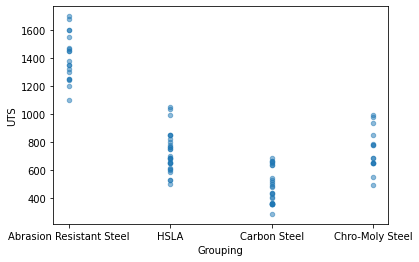

In [ ]:
kom_df_new.plot.scatter(x="Grouping", y="YS", alpha=0.5)
kom_df_new.plot.scatter(x="Grouping", y="UTS", alpha=0.5)

Create function to change Type to numbers 

In [ ]:
def change_to_number(x):
  if x == 'Plate':
    x = 1 
    return x 
  elif x == 'Round Bar':
    x = 2
    return x
  else:
    x = 3
    return x

In [ ]:
kom_df_new["Type"] = kom_df_new["Type"].astype("string")

In [ ]:
kom_df_new['Type'] = kom_df_new.apply(lambda x: change_to_number(x['Type']), axis=1)

print(kom_df_new)

                    Grouping  Type           Name           YS          UTS
0   Abrasion Resistant Steel     1       ABREX450  1192.0+0.0j  1469.0+0.0j
1   Abrasion Resistant Steel     1    EverHard360  1083.0+0.0j  1246.0+0.0j
2   Abrasion Resistant Steel     1    EverHard500  1297.0+0.0j  1449.0+0.0j
3   Abrasion Resistant Steel     1  EverHard500LE  1203.0+0.0j  1681.0+0.0j
4   Abrasion Resistant Steel     1     HARDOX 400  1000.0+0.0j  1250.0+0.0j
..                       ...   ...            ...          ...          ...
85           Chro-Moly Steel     2     UNS H41350   454.0+0.0j   496.0+0.0j
86           Chro-Moly Steel     2     JIS SCCRM3   350.0+0.0j   650.0+0.0j
87           Chro-Moly Steel     2      JIS STH22   551.0+0.0j   782.0+0.0j
88           Chro-Moly Steel     2      JIS SCM3H   521.0+0.0j   935.0+0.0j
89           Chro-Moly Steel     2     JIS SCCrM3   440.0+0.0j   690.0+0.0j

[90 rows x 5 columns]


In [ ]:
kom_df_new["Type"] = kom_df_new["Type"].astype(complex)

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:4211: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


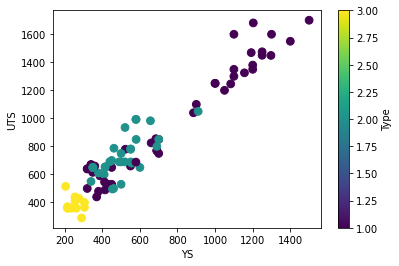

In [ ]:
fig, ax = plt.subplots()
kom_df_new.plot(kind='scatter', x='YS', y='UTS', s=60, c='Type', cmap='viridis', ax=ax) 


In [ ]:
kom_df_new.to_csv('UTS, Yield and Type.csv', index=False)